## Анализ продаж e-commerce (исследование данных, поиск инсайтов, составление рекомендаций стейкхолдерам, построение модели)

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re

In [2]:
df = pd.read_csv('data.csv', encoding = 'WINDOWS-1251')

## 1. Описание датафрейма

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<b>Описание переменных:</b>
- <b>InvoiceNo:</b> номер счета, состоящий из 6 цифр. Если этот код начинается с буквы «c», это означает отмену;
- <b>StockCode: </b> код продукта, состоящий из 5 цифр;
- <b>Description:</b> название продукта;
- <b>Quantity:</b> количество каждого продукта за транзакцию;
- <b>InvoiceDate:</b> представляет день и время создания каждой транзакции;
- <b>UnitPrice:</b> цена продукта за единицу;
- <b>CustomerID:</b> номер клиента, состоящий из 5 цифр. У каждого клиента есть уникальный идентификатор клиента;
- <b>Country:</b> - название страны, в которой проживает каждый покупатель.


In [4]:
# посмотрим на информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# посмотрим на количество пропусков в кадом столбце
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Количество пропусков в %
df.isnull().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Датасет содержит 541 909 строки. В столбцах Description и CustomerID и содержатся пропуски, которые составляют 25% от данных.

Если мы удалим все строки с пропусками,  то останется 406 829 строк

Столбец с датой InvoiceDate имеет тип данных object, который не предназначен для работы с датами.
Преобразуем тип данных в datetime.

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Тажке Customer_ID приведем к целочисленному, т.к. это идентификатор.

## 2. Удаление пропусков

### 2.1. Посмотрим на характер пропусков

In [8]:
# Посмотрим на строки в которой есть пропуск или в столбце Description, или в CustomerID
df_na = df[df['Description'].isna() | df['CustomerID'].isna()]

In [9]:
df_na

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [10]:
df_na.describe()

,Quantity,UnitPrice,CustomerID
count,135080.000000,135080.000000,0.0
mean,1.995573,8.076577,NaN
std,66.696153,151.900816,NaN
min,-9600.000000,-11062.060000,NaN
25%,1.000000,1.630000,NaN
50%,1.000000,3.290000,NaN
75%,3.000000,5.450000,NaN
max,5568.000000,17836.460000,NaN


In [11]:
df_na.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

При наличии пропуска в Описании товара пропуск имеется и в столбце с Идентификатором клиента.

### 2.2. Удалим пропуски, выбросы и дубликаты

In [12]:
df_notnull = df.dropna()

In [13]:
df_notnull

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
# Посмотрим на характеристики очищенного датасета
df_notnull.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Наблюдаем отрицательные значения в столбце с количеством товара. Можно предположить, что это возвраты товаров. Возвраты товаров нам не интересны. Также в столбце с розничной ценой видим нулевые значения. Т.к. мы не можем объяснить проихождение данных записей, то удалим их из датафрейма

In [15]:
# Посмотрим на количество таких строк
len(df_notnull[(df_notnull['Quantity'] < 0) | (df_notnull['UnitPrice'] == 0)])

8945

В датафрейме 8 945 строк с неадекватными значениями.

In [16]:
# Оставим только строки с количеством товара больше 0 и с ценой не равной 0.
df_clean = df_notnull[(df_notnull['Quantity'] > 0) & (df_notnull['UnitPrice'] > 0)]

In [17]:
# Удалим дубликаты
df_clean = df_clean.drop_duplicates()

In [18]:
df_clean.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [19]:
len(df_clean)

392692

Когда удалены дубликаты, то можем преобразовать CustomerID в целочисленному, т.к. этоя является идентификатором.

In [20]:
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

## 3. Анализ

### 3.1. Посчитаем сумму продаж

В датафрейме указана цена за единицу товара. Чтобы посчитать сумму продаж, необходимо добавить новый столбец с общей суммой ( цена за единицу товара * количество товаров).

In [21]:
# Умножим цену за единицу на количество товара
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [22]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [23]:
# Посчитаем выручку
df_clean['TotalPrice'].sum()

8887208.894

### 3.2. Корреляционная зависимость

Text(0.5, 1.0, 'Корреляционная зависимость')

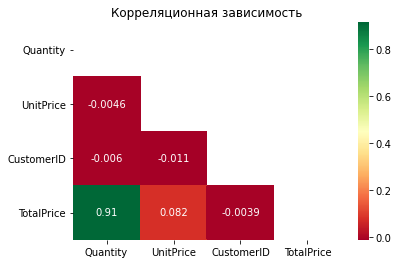

In [24]:
#plt.rcParams['figure.figsize'] = (10, 8)
matrix = np.triu(df_clean.corr())
sns.heatmap(df_clean.corr(), annot=True, cmap='RdYlGn', mask = matrix)
plt.title('Корреляционная зависимость')

Наблюдаем 2 наиболее скоррелированные переменные:
- TotalPrice и Quantity

### 3.3. Сумма продаж в разрезе стран

In [25]:
pd.options.display.float_format = '{:,.2f}'.format #округление до сотых
#pd.set_option('display.float_format', '{:.2f}'.format)
df_country = pd.DataFrame(df_clean.groupby(['Country'])['TotalPrice'].sum())

In [26]:
# Отсортируем датафрейм по убыванию
df_country = df_country.sort_values(['TotalPrice'], ascending=[False])
df_country.head(10)

,TotalPrice
Country,
United Kingdom,"7,285,024.64"
Netherlands,"285,446.34"
EIRE,"265,262.46"
Germany,"228,678.40"
France,"208,934.31"
Australia,"138,453.81"
Spain,"61,558.56"
Switzerland,"56,443.95"
Belgium,"41,196.34"


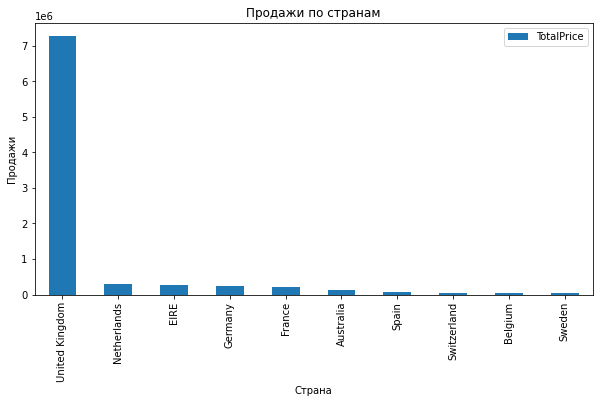

In [27]:
plt.rcParams['figure.figsize'] = (10, 5)
ax = df_country.head(10).plot(kind= 'bar', title = 'Продажи по странам', 
                             xlabel = 'Страна', 
                             ylabel = 'Продажи')

Наиболее высокая выручка в Великобритании. Она существенно выше, чем выручка в остальных странах. Можно предположить, что на международный рынок Компания вышла совсем недавно и низкие продажи наблюдаются именно поэтому. Проверим данную гипотезу.

In [28]:
# исключим из датафрейма транзакции, совершенные в Великобритании
df_hypothesis = df_clean[df_clean['Country'] != 'United Kingdom']
df_hypothesis.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,15.60


In [29]:
# Посмотрим на самую раннюю и позднюю даты совершения покупок за пределами Великобритании
print(df_hypothesis['InvoiceDate'].min())
print(df_hypothesis['InvoiceDate'].max())

2010-12-01 08:45:00
2011-12-09 12:50:00


### 3.4. Количество транзакций в каждой стране

In [30]:
df_clean.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [31]:
df_transaction = pd.DataFrame(df[['Country', 'InvoiceNo']].groupby('Country')['InvoiceNo'].nunique())
df_transaction = df_transaction.sort_values(['InvoiceNo'], ascending=False)
df_transaction.head(10)

,InvoiceNo
Country,
United Kingdom,23494
Germany,603
France,461
EIRE,360
Belgium,119
Spain,105
Netherlands,101
Switzerland,74
Portugal,71


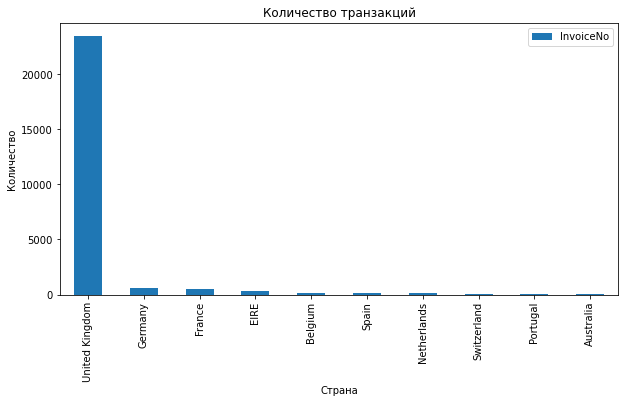

In [32]:
ax = df_transaction.head(10).plot(kind= 'bar', title = 'Количество транзакций', 
                             xlabel = 'Страна', 
                             ylabel = 'Количество')

### 3.5. Средний чек в разрезе стран

In [33]:
# Посмотрим на каждую транзакцию. Нас интересует сумма по каждой транзакции
df_transaction_sum = df_clean.groupby('InvoiceNo').sum()
df_transaction_sum

,Quantity,UnitPrice,CustomerID,TotalPrice
InvoiceNo,,,,
536365,40,27.37,124950,139.12
536366,12,3.70,35700,22.20
536367,83,58.24,156564,278.73
536368,15,19.10,52188,70.05
536369,3,5.95,13047,17.85
...,...,...,...,...
581583,76,3.30,27554,124.60
581584,120,2.57,27554,140.64
581585,278,37.78,331884,329.05


In [34]:
# К транзакции подтянем информацию по стране, в которой была проведена покупка
df_transaction__country = df_clean[['InvoiceNo', 'Country']].set_index('InvoiceNo')
df_transaction__country = df_transaction_sum.join(df_transaction__country, how = 'left').drop_duplicates()
df_transaction__country

,Quantity,UnitPrice,CustomerID,TotalPrice,Country
InvoiceNo,,,,,
536365,40,27.37,124950,139.12,United Kingdom
536366,12,3.70,35700,22.20,United Kingdom
536367,83,58.24,156564,278.73,United Kingdom
536368,15,19.10,52188,70.05,United Kingdom
536369,3,5.95,13047,17.85,United Kingdom
...,...,...,...,...,...
581583,76,3.30,27554,124.60,United Kingdom
581584,120,2.57,27554,140.64,United Kingdom
581585,278,37.78,331884,329.05,United Kingdom


In [35]:
# Посчитаем среднюю сумму транзакции
average_check = pd.DataFrame(df_transaction__country.groupby('Country')['TotalPrice'].mean())
average_check = average_check.rename(columns = {'TotalPrice' : 'average_check'})
average_check = average_check.sort_values(['average_check'], ascending = False)
average_check.head(30)

,average_check
Country,
Singapore,"3,039.90"
Netherlands,"3,036.66"
Australia,"2,514.74"
Japan,"1,969.28"
Lebanon,"1,693.88"
Israel,"1,443.17"
Brazil,"1,143.60"
Switzerland,"1,106.74"
Sweden,"1,065.77"


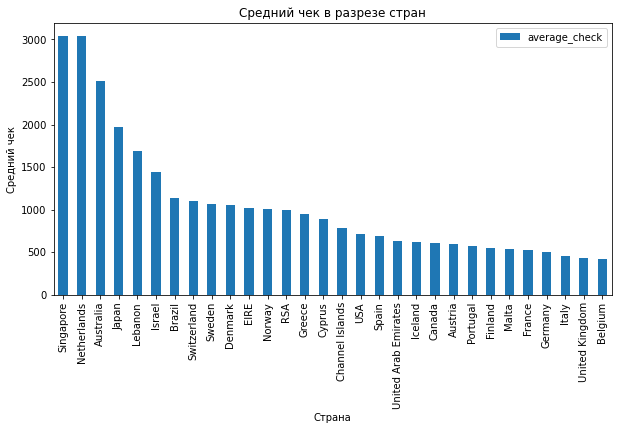

In [36]:
ax = average_check.head(30).plot(kind= 'bar', title = 'Средний чек в разрезе стран', 
                             xlabel = 'Страна', 
                             ylabel = 'Средний чек')

### 3.6. Самые продаваемые товары и товары с низкими продажами

In [37]:
# Подготовим датасет для рассчета
items = df_clean.groupby('Description')['Quantity', 'TotalPrice'].sum()
items

<ipython-input-37-15947c64255f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  items = df_clean.groupby('Description')['Quantity', 'TotalPrice'].sum()


,Quantity,TotalPrice
Description,,
4 PURPLE FLOCK DINNER CANDLES,138,265.66
50'S CHRISTMAS GIFT BAG LARGE,1885,"2,272.25"
DOLLY GIRL BEAKER,2394,"2,754.50"
I LOVE LONDON MINI BACKPACK,359,"1,449.85"
I LOVE LONDON MINI RUCKSACK,1,4.15
...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,4894,"3,879.98"
ZINC TOP 2 DOOR WOODEN SHELF,10,169.50
ZINC WILLIE WINKIE CANDLE STICK,2606,"2,176.10"


### 3.6.1. Самые продаваемые товары

In [38]:
# Посмотрим на топ товаров, котоыре приносят больше дохода
items_total_price = pd.DataFrame(items['TotalPrice'].sort_values(ascending = False))
items_total_price.head(10)

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE","168,469.60"
REGENCY CAKESTAND 3 TIER,"142,264.75"
WHITE HANGING HEART T-LIGHT HOLDER,"100,392.10"
JUMBO BAG RED RETROSPOT,"85,040.54"
MEDIUM CERAMIC TOP STORAGE JAR,"81,416.73"
POSTAGE,"77,803.96"
PARTY BUNTING,"68,785.23"
ASSORTED COLOUR BIRD ORNAMENT,"56,413.03"
Manual,"53,419.93"


<AxesSubplot:title={'center':'Топ 15 товаров по объему выручки'}, xlabel='Товар', ylabel='Сумма'>

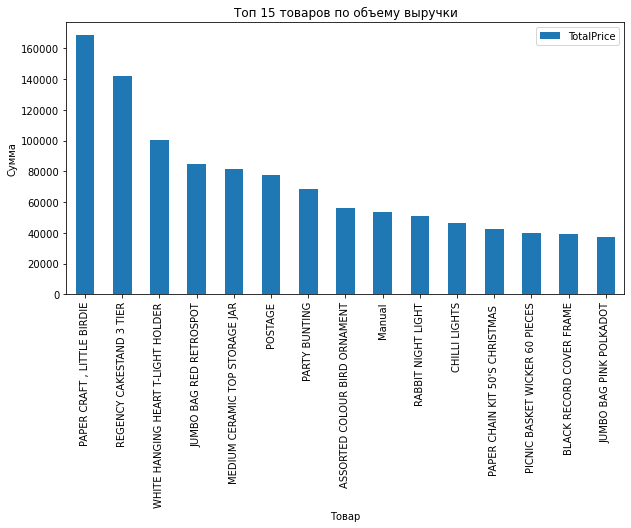

In [39]:
items_total_price.head(15).plot(kind= 'bar', title = 'Топ 15 товаров по объему выручки', 
                             xlabel = 'Товар', 
                             ylabel = 'Сумма')

In [40]:
# Посмотрим на топ 10 товаров по количеству проданных единиц
items_quantity = pd.DataFrame(items['Quantity'].sort_values(ascending = False))
items_quantity.head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35263
PACK OF 72 RETROSPOT CAKE CASES,33670
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153


<AxesSubplot:title={'center':'Топ 15 самых продаваемых товаров по количеству'}, xlabel='Товар', ylabel='Количество'>

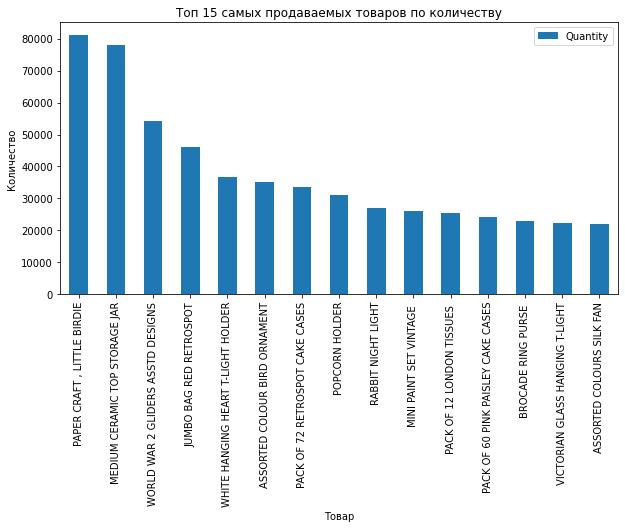

In [41]:
items_quantity.head(15).plot(kind= 'bar', title = 'Топ 15 самых продаваемых товаров по количеству', 
                             xlabel = 'Товар', 
                             ylabel = 'Количество')

### 3.6.2 Товары с низкими продажами

In [42]:
items_total_price_min = pd.DataFrame(items['TotalPrice'].sort_values(ascending = True))
items_total_price_min.head(10)

,TotalPrice
Description,
PADS TO MATCH ALL CUSHIONS,0.00
HEN HOUSE W CHICK IN NEST,0.42
SET 12 COLOURING PENCILS DOILEY,0.65
VINTAGE BLUE TINSEL REEL,0.84
PURPLE FRANGIPANI HAIRCLIP,0.85
PINK CRYSTAL GUITAR PHONE CHARM,0.85
HAPPY BIRTHDAY CARD TEDDY/CAKE,0.95
CAT WITH SUNGLASSES BLANK CARD,0.95
60 GOLD AND SILVER FAIRY CAKE CASES,1.10


In [43]:
items_quantity_min = pd.DataFrame(items['Quantity'].sort_values(ascending = True))
items_quantity_min.head(10)

,Quantity
Description,
BLOSSOM IMAGES SCRAP BOOK SET,1
PACK 4 FLOWER/BUTTERFLY PATCHES,1
BLACK DROP EARRINGS W LONG BEADS,1
VINTAGE BEAD PINK JEWEL STAND,1
SET/3 FLORAL GARDEN TOOLS IN BAG,1
WHITE ROSEBUD PEARL EARRINGS,1
WHITE STONE/CRYSTAL EARRINGS,1
SET/3 TALL GLASS CANDLE HOLDER PINK,1
CROCHET DOG KEYRING,1


Можно простимулировать продажи не популярных товаров с помощью акций и скидок, либо вовсе вывести их из ассортимента.

### 3.7. Сезонность продаж

In [44]:
df_season = df_clean.groupby(pd.Grouper(freq='MS', key='InvoiceDate')).sum()
df_season

,Quantity,UnitPrice,CustomerID,TotalPrice
InvoiceDate,,,,
2010-12-01,311048,"80,679.60",398371675,"570,422.73"
2011-01-01,348473,"66,234.65",318067319,"568,101.31"
2011-02-01,265027,"62,619.48",301727994,"446,084.92"
2011-03-01,347582,"87,864.79",407858866,"594,081.76"
2011-04-01,291366,"78,543.48",342666568,"468,374.33"
2011-05-01,372864,"101,500.91",427263815,"677,355.15"
2011-06-01,363014,"84,602.66",412518212,"660,046.05"
2011-07-01,367360,"75,454.52",406784607,"598,962.90"
2011-08-01,397373,"78,877.09",408614424,"644,051.04"


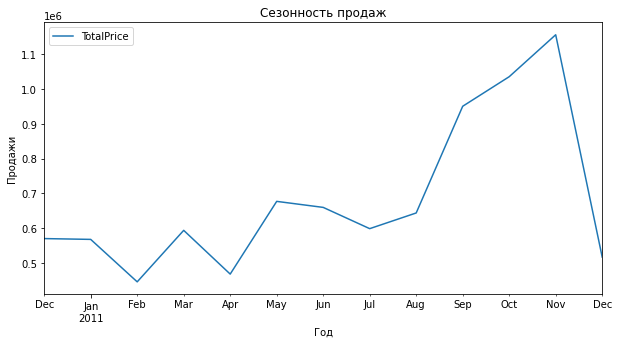

In [45]:
ax = df_season[['TotalPrice']].plot(title='Сезонность продаж', 
                             xlabel='Год', 
                             ylabel='Продажи')

Продажи в Декабре 2010 и Январе 2011 года примерно на одном уровне. Далее с Февраля по Май наблюдаем нестабильность продаж. С Мая по Август отсутствуют резкие скачки, продажи примерно на одном уровне. С Августа наблюдается рост продаж. В декабре 2011 продажи слабые, но это обусловлено тем, что есть данные только до 9 декабря 2011. Рост продаж ближе к концу года можно объяснить тем, что многие начинают покупать подарки к Новогодним праздникам.

## 4. ABC-XYZ-анализ

ABC-XYZ-анализ позволяет понять, какие товары приносит основной доход, а от чего лучше отказаться. 

### 4.1. ABC-анализ

<b> Подготовим данные: </b>

In [46]:
abc = pd.DataFrame(df_clean.groupby('Description')['TotalPrice'].sum())
abc['Share'] = round(((abc['TotalPrice'] / (abc['TotalPrice'].sum())) * 100), 2) # Добавим столбец с долей от общей выручки в %
abc = abc.sort_values('Share', ascending = False) # Отсортируем по убыванию доли в выручке
abc['ShareCumsum'] = abc['Share'].cumsum() # добавим долю выручки с нарастающим итогом
abc

,TotalPrice,Share,ShareCumsum
Description,,,
"PAPER CRAFT , LITTLE BIRDIE","168,469.60",1.90,1.90
REGENCY CAKESTAND 3 TIER,"142,264.75",1.60,3.50
WHITE HANGING HEART T-LIGHT HOLDER,"100,392.10",1.13,4.63
JUMBO BAG RED RETROSPOT,"85,040.54",0.96,5.59
MEDIUM CERAMIC TOP STORAGE JAR,"81,416.73",0.92,6.51
...,...,...,...
LARGE CAMPHOR WOOD FIELD MUSHROOM,107.30,0.00,98.39
LARGE CRYSTAL DIAMANTE HAIRSLIDE,9.90,0.00,98.39
LARGE JEWELLERY STAND,125.00,0.00,98.39


Разобьем все товары на три группы:

- А — дают 80% выручки;
- В — формируют 15% выручки;
- С — дополняют оставшиеся 5%.

In [47]:
# Добавим столбец с группой товара
abc.loc[(abc['ShareCumsum'] <= 80), 'Group'] = 'A'
abc.loc[((abc['ShareCumsum'] > 80) & (abc['ShareCumsum'] <= 95)), 'Group'] = 'B'
abc.loc[((abc['ShareCumsum'] > 95) & (abc['ShareCumsum'] <= 100)), 'Group'] = 'C'

In [48]:
abc

,TotalPrice,Share,ShareCumsum,Group
Description,,,,
"PAPER CRAFT , LITTLE BIRDIE","168,469.60",1.90,1.90,A
REGENCY CAKESTAND 3 TIER,"142,264.75",1.60,3.50,A
WHITE HANGING HEART T-LIGHT HOLDER,"100,392.10",1.13,4.63,A
JUMBO BAG RED RETROSPOT,"85,040.54",0.96,5.59,A
MEDIUM CERAMIC TOP STORAGE JAR,"81,416.73",0.92,6.51,A
...,...,...,...,...
LARGE CAMPHOR WOOD FIELD MUSHROOM,107.30,0.00,98.39,C
LARGE CRYSTAL DIAMANTE HAIRSLIDE,9.90,0.00,98.39,C
LARGE JEWELLERY STAND,125.00,0.00,98.39,C


In [49]:
abc_viz = pd.DataFrame(abc.groupby('Group')['TotalPrice'].count())
abc_viz = abc_viz.rename(columns = {'TotalPrice' : 'Count'})
abc_viz

,Count
Group,
A,810
B,992
C,2075


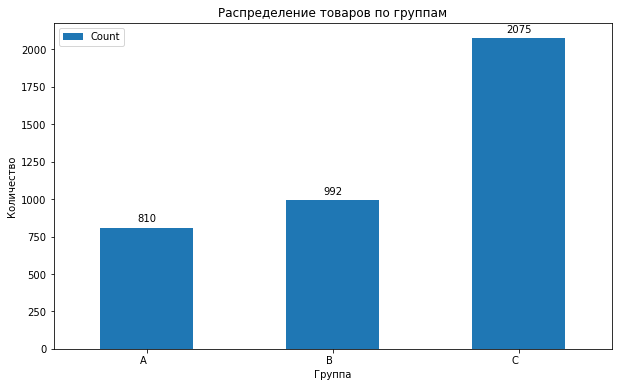

In [50]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

ax = abc_viz.plot(kind= 'bar', title = 'Распределение товаров по группам', 
                             xlabel = 'Группа', 
                             ylabel = 'Количество'
                             )
plt.xticks(rotation=0, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

### 4.2. XYZ-анализ

XYZ-анализ распределяет товары в зависимости от стабильности спроса

<b> Подготовим данные: </b>

In [51]:
xyz = df_clean.groupby(['Description', pd.Grouper(freq='MS', key='InvoiceDate')]).sum().reset_index()
xyz = xyz[['Description', 'InvoiceDate' , 'TotalPrice']] # оставим только необходимые столбцы
xyz.head(10)

,Description,InvoiceDate,TotalPrice
0,4 PURPLE FLOCK DINNER CANDLES,2010-12-01,35.70
1,4 PURPLE FLOCK DINNER CANDLES,2011-01-01,5.10
2,4 PURPLE FLOCK DINNER CANDLES,2011-02-01,2.55
3,4 PURPLE FLOCK DINNER CANDLES,2011-04-01,17.85
4,4 PURPLE FLOCK DINNER CANDLES,2011-05-01,7.65
5,4 PURPLE FLOCK DINNER CANDLES,2011-06-01,5.10
6,4 PURPLE FLOCK DINNER CANDLES,2011-07-01,7.65
7,4 PURPLE FLOCK DINNER CANDLES,2011-08-01,2.55
8,4 PURPLE FLOCK DINNER CANDLES,2011-09-01,22.95
9,4 PURPLE FLOCK DINNER CANDLES,2011-10-01,7.65


In [52]:
len(xyz['InvoiceDate'].unique())

13

<b> Вычислим среднемесячную выручку: </b>

In [53]:
xyz_analisis = pd.DataFrame(xyz.groupby(['Description'])['TotalPrice'].mean())
xyz_analisis = xyz_analisis.rename(columns = {'TotalPrice' : 'AverageMonthlyRevenue'})
xyz_analisis

,AverageMonthlyRevenue
Description,
4 PURPLE FLOCK DINNER CANDLES,22.14
50'S CHRISTMAS GIFT BAG LARGE,454.45
DOLLY GIRL BEAKER,459.08
I LOVE LONDON MINI BACKPACK,362.46
I LOVE LONDON MINI RUCKSACK,4.15
...,...
ZINC T-LIGHT HOLDER STARS SMALL,431.11
ZINC TOP 2 DOOR WOODEN SHELF,28.25
ZINC WILLIE WINKIE CANDLE STICK,167.39


In [54]:
# Посчитаем стандартное отклонение
xyz_std  = xyz.groupby(['Description']).std()
xyz_std = xyz_std.rename(columns = {'TotalPrice' : 'std'})
xyz_std

,std
Description,
4 PURPLE FLOCK DINNER CANDLES,30.99
50'S CHRISTMAS GIFT BAG LARGE,460.63
DOLLY GIRL BEAKER,405.45
I LOVE LONDON MINI BACKPACK,253.32
I LOVE LONDON MINI RUCKSACK,nan
...,...
ZINC T-LIGHT HOLDER STARS SMALL,266.33
ZINC TOP 2 DOOR WOODEN SHELF,27.68
ZINC WILLIE WINKIE CANDLE STICK,134.35


In [55]:
# Заменим nan на 0
xyz_std = xyz_std.replace(np.nan, 0)
xyz_std

,std
Description,
4 PURPLE FLOCK DINNER CANDLES,30.99
50'S CHRISTMAS GIFT BAG LARGE,460.63
DOLLY GIRL BEAKER,405.45
I LOVE LONDON MINI BACKPACK,253.32
I LOVE LONDON MINI RUCKSACK,0.00
...,...
ZINC T-LIGHT HOLDER STARS SMALL,266.33
ZINC TOP 2 DOOR WOODEN SHELF,27.68
ZINC WILLIE WINKIE CANDLE STICK,134.35


In [56]:
# Объединим таблицы со среднем значением ежемесячной выручки и стандартным отклонением
xyz_analisis = xyz_analisis.join(xyz_std, how = 'left')
xyz_analisis

,AverageMonthlyRevenue,std
Description,,
4 PURPLE FLOCK DINNER CANDLES,22.14,30.99
50'S CHRISTMAS GIFT BAG LARGE,454.45,460.63
DOLLY GIRL BEAKER,459.08,405.45
I LOVE LONDON MINI BACKPACK,362.46,253.32
I LOVE LONDON MINI RUCKSACK,4.15,0.00
...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,431.11,266.33
ZINC TOP 2 DOOR WOODEN SHELF,28.25,27.68
ZINC WILLIE WINKIE CANDLE STICK,167.39,134.35


In [57]:
# Посчитаем коэффициент вариации
xyz_analisis['CoefficientOfVariation'] = xyz_analisis['std'] / xyz_analisis['AverageMonthlyRevenue']
xyz_analisis

,AverageMonthlyRevenue,std,CoefficientOfVariation
Description,,,
4 PURPLE FLOCK DINNER CANDLES,22.14,30.99,1.40
50'S CHRISTMAS GIFT BAG LARGE,454.45,460.63,1.01
DOLLY GIRL BEAKER,459.08,405.45,0.88
I LOVE LONDON MINI BACKPACK,362.46,253.32,0.70
I LOVE LONDON MINI RUCKSACK,4.15,0.00,0.00
...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,431.11,266.33,0.62
ZINC TOP 2 DOOR WOODEN SHELF,28.25,27.68,0.98
ZINC WILLIE WINKIE CANDLE STICK,167.39,134.35,0.80


Разобьем товары на 3 группы по значению коэффициента вариации по каждому товару:

- Группа Х — стабильный спрос, объем продаж от месяца к месяцу почти не изменяются: КВ < 0,1.
- Группа Y — условно стабильный спрос, т. е. объемы продаж меняются, но без резких скачков: 0,25 > КВ > 0,1.
- Группа Z — спрос нестабилен, покупатели приобретают товар от случая к случаю: КВ > 0,25.

In [58]:
# Добавим столбец с группой товара
xyz_analisis.loc[(xyz_analisis['CoefficientOfVariation'] <= 0.1), 'Group_xyz'] = 'X'
xyz_analisis.loc[((xyz_analisis['CoefficientOfVariation'] > 0.1) & (xyz_analisis['CoefficientOfVariation'] <= 0.25)), 'Group_xyz'] = 'Y'
xyz_analisis.loc[(xyz_analisis['CoefficientOfVariation'] > 0.25), 'Group_xyz'] = 'Z'

In [59]:
xyz_analisis

,AverageMonthlyRevenue,std,CoefficientOfVariation,Group_xyz
Description,,,,
4 PURPLE FLOCK DINNER CANDLES,22.14,30.99,1.40,Z
50'S CHRISTMAS GIFT BAG LARGE,454.45,460.63,1.01,Z
DOLLY GIRL BEAKER,459.08,405.45,0.88,Z
I LOVE LONDON MINI BACKPACK,362.46,253.32,0.70,Z
I LOVE LONDON MINI RUCKSACK,4.15,0.00,0.00,X
...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,431.11,266.33,0.62,Z
ZINC TOP 2 DOOR WOODEN SHELF,28.25,27.68,0.98,Z
ZINC WILLIE WINKIE CANDLE STICK,167.39,134.35,0.80,Z


In [60]:
xyz_viz = pd.DataFrame(xyz_analisis.groupby('Group_xyz')['AverageMonthlyRevenue'].count())
xyz_viz = xyz_viz.rename(columns = {'AverageMonthlyRevenue' : 'Count'})
xyz_viz

,Count
Group_xyz,
X,378
Y,36
Z,3463


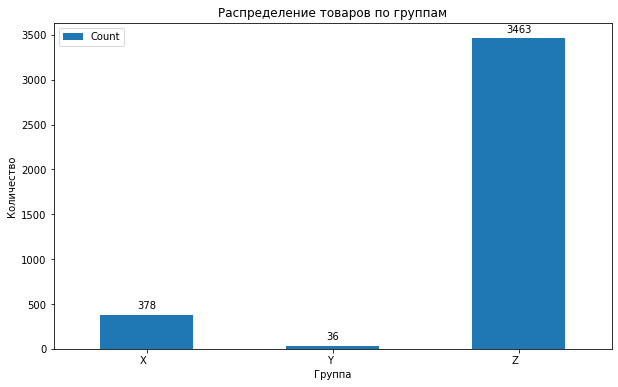

In [61]:
###### увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

bx = xyz_viz.plot(kind= 'bar', title = 'Распределение товаров по группам', 
                             xlabel = 'Группа', 
                             ylabel = 'Количество'
                             )
plt.xticks(rotation=0, ha='right')

for p in bx.patches:
    bx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

Видим, что подавляющее большинство товаров имеют нестабильный спрос. Товаров с условно стабильным спросом без резких скачков продаж самая малая часть. Но товары со стабильным спросом все-же имееются.

### 4.3. Объединенный ABC-XYZ-анализ

- <b> Товары из групп AX и BX </b> обеспечивают основной доход и при этом стабильно продаются. Они всегда должны быть на складе. Необходимый запас легко спрогнозировать, так как объемы продаж почти не меняются от месяца к месяцу. 
- <b> Группы АY и BY </b> — это тоже высокий доход, но стабильность продаж уже ниже. По этим товарам на складе необходимо создать дополнительные резервы, на случай роста спроса в отдельные периоды. Резерв нужен обязательно, это важные для компании группы, которые приносят значительную часть дохода. 
- <b> Группы AZ и BZ </b> тоже приносят существенный доход. Но спрос на них почти невозможно спрогнозировать. Если создавать запасы на складе, исходя из максимально возможной месячной выручки, то значительная часть товара может остаться непроданной. Поэтому лучше использовать другие способы, которые обеспечат нужное количество товара. Например, заключить договоры с поставщиками, которые находятся максимально близко от магазина и могут в любой момент привезти нужную партию. 
- <b> Группа CX </b> продается стабильно, но в небольших объемах. По этой позиции нужно создать постоянный запас, исходя из среднего объема продаж.
- <b> Группа CY </b> — небольшие объемы продаж и невысокая стабильность. Запасы этой группы нужно создавать по остаточному принципу, т. е. после того, как выделены деньги на закупки товаров из более выгодных групп. Даже если в какой-то момент товара из этой группы не окажется на складе, потери компании будут невелики.
- <b> Группа CZ </b> — самые низкие объемы выручки, при этом спрос невозможно спрогнозировать. Сюда относятся товары, которые уже перестали пользоваться спросом. Запасы по этой категории обычно не создают, работают под заказ. Но! В эту группу могут попасть и новинки. Они не пользуются спросом потому, что клиенты пока о них не знают. Эти товары еще не привезли в магазины, не выставили на витринах, не запустили маркетинговую кампанию и пр. Учитывайте этот момент при анализе.

In [62]:
abc_xyz = abc.join(xyz_analisis, how = 'left')
abc_xyz = abc_xyz[['Group', 'Group_xyz']]
abc_xyz['Group_abc_xyz'] = abc_xyz['Group'] + abc_xyz['Group_xyz']
abc_xyz

,Group,Group_xyz,Group_abc_xyz
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",A,X,AX
REGENCY CAKESTAND 3 TIER,A,Z,AZ
WHITE HANGING HEART T-LIGHT HOLDER,A,Z,AZ
JUMBO BAG RED RETROSPOT,A,Z,AZ
MEDIUM CERAMIC TOP STORAGE JAR,A,Z,AZ
...,...,...,...
LARGE CAMPHOR WOOD FIELD MUSHROOM,C,Z,CZ
LARGE CRYSTAL DIAMANTE HAIRSLIDE,C,Z,CZ
LARGE JEWELLERY STAND,C,X,CX


In [63]:
abc_xyz_viz = pd.DataFrame(abc_xyz.groupby(['Group_abc_xyz'])['Group'].count())
abc_xyz_viz

,Group
Group_abc_xyz,
AX,2
AY,7
AZ,801
BX,4
BY,3
BZ,985
CX,372
CY,26
CZ,1677


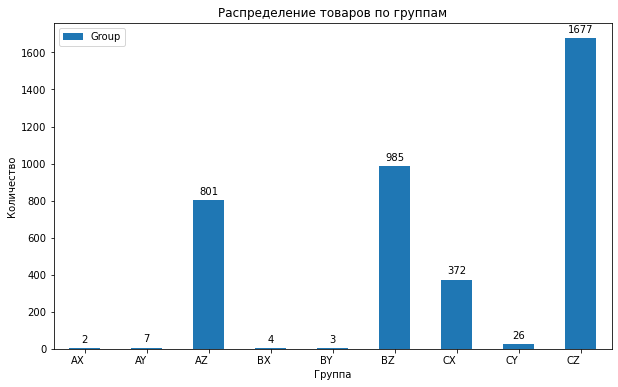

In [64]:
cx = abc_xyz_viz.plot(kind= 'bar', title = 'Распределение товаров по группам', 
                             xlabel = 'Группа', 
                             ylabel = 'Количество'
                             )
plt.xticks(rotation=0, ha='right')

for p in cx.patches:
    cx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

In [65]:
df_clean.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 5. RFM-анализ

<b> RFM-анализ </b> — метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех, которые приносят больше денег.

Аббревиатура RFM расшифровывается:

- Recency — давность (как давно ваши клиенты что-то у вас покупали);
- Frequency — частота (как часто они у вас покупают);
- Monetary — деньги (общая сумма покупок).
По этим признакам можно разделить всех ваших клиентов на группы, понять, кто покупает у вас часто и много, кто — часто, но мало, а кто вообще давно ничего не покупал.

Как правило, небольшой процент пользователей реагирует на общие рекламные предложения. RFM-анализ и RFM-сегментация являются отличным методом прогнозирования реакции клиента и улучшения взаимодействия, а также повышение прибыли. RFM использует поведение покупателей, чтобы определить, как работать с каждой группой клиентов. 

Всего 4 338 клиентов. 

In [66]:
# Дата последней покупки
df_clean['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Т.к. последняя дата покупки 09.12.2011, то считать давность начнем с 11.12.2021 для исключения отрицательных и нулевых значений количества дней с момента последней покупки.

In [67]:
today_date = dt.datetime(2011,12,11)

rfm = df_clean.groupby('CustomerID').agg({'InvoiceDate': lambda invoice_date: (today_date - invoice_date.max()).days,
                                    'InvoiceNo': lambda invoice: invoice.nunique(),
                                    'TotalPrice': lambda total_price: total_price.sum()})

rfm.columns = ['recency','frequency','monetary']
rfm = rfm.reset_index()
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,326,1,"77,183.60"
1,12347,3,7,"4,310.00"
2,12348,76,4,"1,797.24"
3,12349,19,1,"1,757.55"
4,12350,311,1,334.40


In [68]:
# Посмотрим на характеристики
rfm.describe()

,CustomerID,recency,frequency,monetary
count,"4,338.00","4,338.00","4,338.00","4,338.00"
mean,"15,300.41",93.06,4.27,"2,048.69"
std,"1,721.81",100.01,7.70,"8,985.23"
min,"12,346.00",1.00,1.00,3.75
25%,"13,813.25",18.00,1.00,306.48
50%,"15,299.50",51.00,2.00,668.57
75%,"16,778.75",142.75,5.00,"1,660.60"
max,"18,287.00",374.00,209.00,"280,206.02"


Для того чтобы разделить клиентов по давности покупки посчитаем процентиль 33% и 66%.
Получается три равные группы: кто совершил заказ максимум 25 дней назад (недавние), от 25 до 89 дней включительно (относительно недавние) и от 82 дней (самые давние клиенты).

In [69]:
r_33 = np.percentile(rfm['recency'], 33)
r_66 = np.percentile(rfm['recency'], 66)
print('33 процентиль:', r_33)
print('66 процентиль:', r_66)

33 процентиль: 25.0
66 процентиль: 89.0


Дя того чтобы разделить клиентов по частоте покупки аналогично посчитаем процентиль 33% и 66%.
Получается также три равные группы: первая совершает до 1 заказов, вторая — от 1 до 4, третья — больше 4.

In [70]:
f_33 = np.percentile(rfm['frequency'], 33)
f_66 = np.percentile(rfm['frequency'], 66)
print('33 процентиль:', f_33)
print('66 процентиль:', f_66)

33 процентиль: 1.0
66 процентиль: 4.0


При делении клиентов по сумме покупок получается также три равные группы: первая совершает заказ на сумму до 384.1, вторая — от 384.1 до 1154.43, третья — больше 1154.43.

In [71]:
m_33 = np.percentile(rfm['monetary'], 33)
m_66 = np.percentile(rfm['monetary'], 66)
print('33 процентиль:', round(m_33, 2))
print('66 процентиль:', round(m_66, 2))

33 процентиль: 384.1
66 процентиль: 1154.43


Добавим столбцы с группами по каждому признаку:

<b> Давность заказа: </b>
- 1 — давние;
- 2 — «спящие» (относительно недавние);
- 3 — недавние.

In [72]:
# Напишем функцию для проставления признака по давности
def classification_recency(i):
    if i  <= r_33:
        return 3
    elif i  <= r_66 and i > r_33:
        return 2
    elif i  > r_66:
        return 1

 
<b> Частота покупок: </b>
- 1 — разовые;
- 2 — редкие;
- 3 — частые.

In [73]:
# Напишем функцию для проставления признака по частоте покупок
def classification_frequency(i):
    if i  <= f_33:
        return 1
    elif i  <= f_66 and i > f_33:
        return 2
    elif i  > f_66:
        return 3

<b> Сумма покупок: </b>
- 1 — низкий чек;
- 2 — средний чек;
- 3 — высокий чек.

In [74]:
# Напишем функцию для проставления признака по сумме покупок
def classification_monetary(i):
    if i  <= m_33:
        return 1
    elif i  <= m_66 and i > m_33:
        return 2
    elif i  > m_66:
        return 3

In [75]:
# применим функцию и запишем результат в новый столбец
rfm['R'] = rfm['recency'].apply(classification_recency)
rfm['F'] = rfm['frequency'].apply(classification_frequency)
rfm['M'] = rfm['monetary'].apply(classification_monetary)
rfm.head()

,CustomerID,recency,frequency,monetary,R,F,M
0,12346,326,1,"77,183.60",1,1,3
1,12347,3,7,"4,310.00",3,3,3
2,12348,76,4,"1,797.24",2,2,3
3,12349,19,1,"1,757.55",3,1,3
4,12350,311,1,334.40,1,1,1


<b> Cформируем сегменты по совокупности показателей: R, F, M </b>

Теперь у нас есть диапазоны для каждого показателя, и этим диапазонам надо присвоить оценку — коэффициент качества. Например, от 1 до 3. Но количество может быть и больше в зависимости от того, насколько детально вы хотите проработать сегменты. 3 — стандартное число.

Мы считали, что 1 — это худшее значение, а 3 — лучшее. Получается три оценки по давности для каждого из трёх показателей. Из совокупности трёх показателей с одинаковыми оценками складывается сегмент:

- R1—F1—M(1–3) — потерянные;
- R1—F(2–3)—M(1–3) — лояльные клиенты, потерявшие активность;
- R2—F(1–2)—M(1–3) — спящие;
- R2—F(3)—M(1–3) — лояльные спящие клиенты;
- R3—F1—M(1–3) — новички;
- R3—F2—M(1–3) — развивающиеся;
- R3—F3—M3 — постоянные.

In [76]:
rfm['RFM'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM
0,12346,326,1,"77,183.60",1,1,3,113
1,12347,3,7,"4,310.00",3,3,3,333
2,12348,76,4,"1,797.24",2,2,3,223
3,12349,19,1,"1,757.55",3,1,3,313
4,12350,311,1,334.40,1,1,1,111


In [77]:
# Добавим столбец с сегментом
seg_map = {r'333': 'Постоянные',
           r'3[2-3][1-3]': 'Развивающиеся',
           r'31[1-3]': 'Новички',
           r'23[1-3]': 'Лояльные спящие клиенты',
           r'2[1-2][1-3]': 'Спящие',
           r'1[2-3][1-3]': 'Лояльные клиенты, потерявшие активность',
           r'11[1-3]': 'Потерянные'
           }

rfm['segment'] = rfm['RFM'].replace(seg_map, regex=True)
rfm.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM,segment
0,12346,326,1,"77,183.60",1,1,3,113,Потерянные
1,12347,3,7,"4,310.00",3,3,3,333,Постоянные
2,12348,76,4,"1,797.24",2,2,3,223,Спящие
3,12349,19,1,"1,757.55",3,1,3,313,Новички
4,12350,311,1,334.40,1,1,1,111,Потерянные


In [78]:
# Посчитаем количество клиентов в каждом сегменте:
rfm_viz = pd.DataFrame(rfm.groupby(['segment'])['CustomerID'].count())
rfm_viz

,CustomerID
segment,
"Лояльные клиенты, потерявшие активность",609
Лояльные спящие клиенты,323
Новички,166
Постоянные,653
Потерянные,854
Развивающиеся,622
Спящие,1111


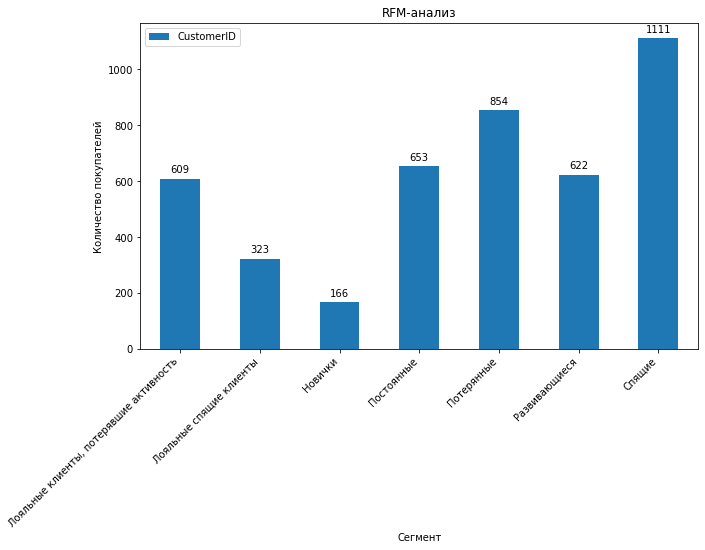

In [79]:
rx = rfm_viz.plot(kind= 'bar', title = 'RFM-анализ', 
                             xlabel = 'Сегмент', 
                             ylabel = 'Количество покупателей'
                             )
plt.xticks(rotation=45, ha='right')

for p in rx.patches:
    rx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

В результате RFM-анализа видим, что у нас <b> 653 постоянных клиента </b> , которые совершают покупки часто и на большую сумму. Можно попросить оставить отзыв и сообщить о персональном обслуживании. 

На <b> потерянных клиентов </b> не стоит тратить много времени и усилий. Можно попробовать их вернуть, рассказав об акциях, скидках и распродажах или написать почему выгодно оставаться с нами.

<b> Лояльным клиентам, потреявшим активность, также лояльным спящим клиентам и спящим </b> можно предложить  купон на скидку, бонусы, персональную товарную подборку или рассказать о распродаже. 

<b> Новичкам </b> можно предложить помощь в выборе продукта. Необходимо их перевести в ряды лояльных. Также можно поздравить с покупкой или поблагодарить за выбор нашей компании.

Необходимо удержать интерес <b> развивающихся клиентов </b>, которых большинство.
 
Можно выяснить с помощью опроса, доволен ли клиент и какие у него пожелания. И другую информацию, которая пригодится для удержания: что ему интересно, какие у него потребности.

Таким клиентам можно не предлагать персональные скидки, т.к. у них все шансы стать постоянными покупателями по полной стоимости. Лучше мотивировать чем-то другим. Например, шанс получить подарок в обмен на отзыв.
 

## 6. Построим модель, предсказывающую объем продаж на будущие 3 месяца

С помощью метода линейной регрессии, спрогнозируем объем продаж на будущие 3 месяца и проверим качество модели с помощью метрики RMSE.

In [80]:
# Подготовим датасет
df_model = df_clean.groupby(pd.Grouper(freq='MS', key='InvoiceDate')).sum().reset_index() #cгруппируем по месяцам
df_model = df_model[['InvoiceDate', 'TotalPrice']] #оставим только необходимые столбцы
df_model = df_model[df_model['InvoiceDate'] != '2011-12-01'] #исключим декабрь 2011, т.к.данные не за полный месяц
df_model

,InvoiceDate,TotalPrice
0,2010-12-01,"570,422.73"
1,2011-01-01,"568,101.31"
2,2011-02-01,"446,084.92"
3,2011-03-01,"594,081.76"
4,2011-04-01,"468,374.33"
5,2011-05-01,"677,355.15"
6,2011-06-01,"660,046.05"
7,2011-07-01,"598,962.90"
8,2011-08-01,"644,051.04"
9,2011-09-01,"950,690.20"


In [81]:
import datetime
df_model['month'] = pd.DatetimeIndex(df_model['InvoiceDate']).month
df_model['year'] = pd.DatetimeIndex(df_model['InvoiceDate']).year
df_model

,InvoiceDate,TotalPrice,month,year
0,2010-12-01,"570,422.73",12,2010
1,2011-01-01,"568,101.31",1,2011
2,2011-02-01,"446,084.92",2,2011
3,2011-03-01,"594,081.76",3,2011
4,2011-04-01,"468,374.33",4,2011
5,2011-05-01,"677,355.15",5,2011
6,2011-06-01,"660,046.05",6,2011
7,2011-07-01,"598,962.90",7,2011
8,2011-08-01,"644,051.04",8,2011
9,2011-09-01,"950,690.20",9,2011


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
X = df_model[['month', 'year']]
y = df_model['TotalPrice']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train) # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [86]:
y_pred = model.predict(X_test)
y_pred

array([896250.45897055, 843855.3180697 ])

In [87]:
X_test_pred = X_test.copy()
X_test_pred['y_pred'] = y_pred
X_test_pred['y_test'] = y_test
X_test_pred

,month,year,y_pred,y_test
10,10,2011,"896,250.46","1,035,642.45"
9,9,2011,"843,855.32","950,690.20"


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

124184.98215877629

Предскажем продажи на будущие 3 месяца: декабрь 2011, январь 2012 и февраль 2012

In [90]:
X_pred_3month = pd.DataFrame({'month' : [12, 1, 2], 'year' : [2011, 2012, 2012]})
X_pred_3month

,month,year
0,12,2011
1,1,2012
2,2,2012


In [91]:
#Сделаем прогноз
y_pred_3month = model.predict(X_pred_3month)
y_pred_3month

array([1001040.74077213,  855312.20163536,  907707.34253621])

In [92]:
X_test_pred_3month = X_pred_3month.copy()
X_test_pred_3month['y_pred'] = y_pred_3month
X_test_pred_3month

,month,year,y_pred
0,12,2011,"1,001,040.74"
1,1,2012,"855,312.20"
2,2,2012,"907,707.34"


In [93]:
df_clean.to_csv('df.csv') #сохраним датафрейм в файл для построения дашборда